In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.mixture import GMM
from helpers.iaml01cw2_helpers import *

In [71]:
%matplotlib inline

In [2]:
Xtrn, Ytrn, Xtst, Ytst = load_CoVoST2("data/")

In [10]:
# 3.1
kmeans = KMeans(n_clusters=22, random_state=1)
kmeans.fit(Xtrn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=22, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [11]:
Y_kmeans = kmeans.predict(Xtrn)

In [59]:
clusters = kmeans.cluster_centers_

In [66]:
num_samples = {}
sum_squared_dists = {}
for i in range(22):
    mask = Y_kmeans == i
    center_i = Xtrn[mask]
    num_samples[i] = center_i.shape[0]
    pair_dists = pairwise_distances(center_i, clusters[i].reshape(1,-1))
    pair_dists_sum = np.sum(pair_dists, axis=0)[0]
    sum_squared_dists[i] = pair_dists_sum

In [69]:
num_samples

{0: 1018,
 1: 1125,
 2: 1191,
 3: 890,
 4: 1162,
 5: 1332,
 6: 839,
 7: 623,
 8: 1400,
 9: 838,
 10: 659,
 11: 1276,
 12: 121,
 13: 152,
 14: 950,
 15: 1971,
 16: 1251,
 17: 845,
 18: 896,
 19: 930,
 20: 1065,
 21: 1466}

In [70]:
sum_squared_dists

{0: 1182.0398,
 1: 1360.9644,
 2: 1457.4814,
 3: 1206.8549,
 4: 1412.8635,
 5: 1575.6184,
 6: 1169.6694,
 7: 991.5261,
 8: 1641.1821,
 9: 1200.4832,
 10: 715.7619,
 11: 1517.0513,
 12: 196.9747,
 13: 247.06387,
 14: 1290.1027,
 15: 2164.1633,
 16: 1615.7766,
 17: 1229.8411,
 18: 1101.7834,
 19: 1346.9763,
 20: 1421.5784,
 21: 1743.0022}

In [79]:
# 3.2
pca_2 = PCA(n_components=2).fit(Xtrn)

In [140]:
mean_vecs = np.zeros_like(clusters)
for i in range(22):
    mask = Ytrn == i
    lang_i = Xtrn[mask]
    mean_lang_i = lang_i.mean(axis=0)
    mean_vecs[i] = mean_lang_i

In [141]:
mean_vecs_transformed = pca_2.transform(mean_vecs)

In [142]:
mean_vecs_transformed

array([[-0.7911552 ,  0.23984121],
       [ 0.06686637, -0.07494533],
       [-0.08237226, -0.186045  ],
       [ 0.44664675, -0.2374197 ],
       [-0.3455662 , -0.08697221],
       [-0.10456123,  0.24788049],
       [-0.63610506, -0.12838092],
       [-0.24574125, -0.24519178],
       [ 0.14739092, -0.10083619],
       [-0.33546174, -0.38380367],
       [ 0.12047352, -0.00152772],
       [ 0.3571244 , -0.15621756],
       [ 0.8126232 , -0.33144802],
       [-0.49892777, -0.16407111],
       [-0.13609089,  0.00611117],
       [-0.18480782, -0.03113791],
       [ 0.6211649 , -0.40628946],
       [-0.42009562, -0.00534137],
       [ 0.11759134,  0.3377081 ],
       [-0.5463195 , -0.15991646],
       [-0.03889532, -0.3901724 ],
       [-0.2106026 , -0.20204245]], dtype=float32)

In [143]:
clusters_transformed = pca_2.transform(clusters)

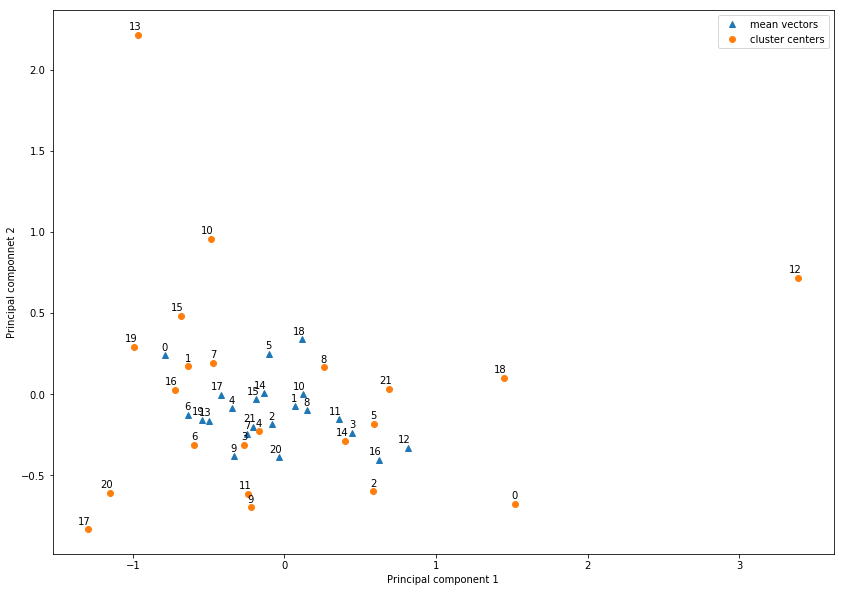

In [160]:
plt.figure(figsize=(14, 10))
plt.plot(mean_vecs_transformed[:, 0], mean_vecs_transformed[:, 1], '^', label="mean vectors")
plt.plot(clusters_transformed[:, 0], clusters_transformed[:, 1], 'o', label="cluster centers")

for i in range(22):
    plt.annotate(i, xy=(mean_vecs_transformed[i]), xytext=(3, 3), textcoords='offset points', ha='right', va='bottom')
    plt.annotate(i, xy=(clusters_transformed[i]), xytext=(3, 3), textcoords='offset points', ha='right', va='bottom')
plt.xlabel("Principal component 1")
plt.ylabel("Principal componnet 2")
plt.legend()
plt.savefig("results/3_2.png")
plt.show()

In [185]:
mean_vecs.shape

(22, 26)

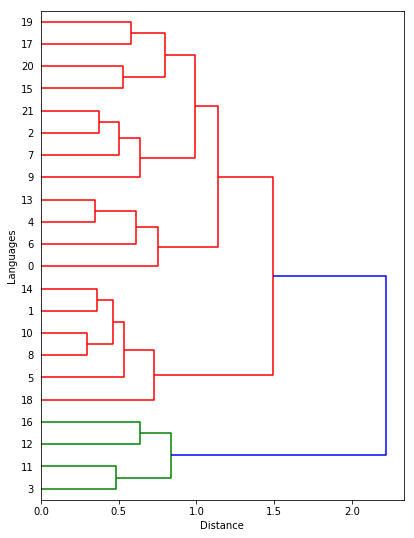

In [195]:
# 3.3
Z = hierarchy.linkage(mean_vecs, method="ward")
labels = range(22)
plt.figure(figsize=(6.5, 9))
hierarchy.dendrogram(Z, labels=labels, distance_sort="descending", orientation="right", show_leaf_counts=True)
plt.ylabel("Languages")
plt.xlabel("Distance")
plt.savefig("results/3_3.png")
plt.show()

In [178]:
# 3.4
vecs = None
for k in range(22):
    kmeans_k = KMeans(n_clusters=3, random_state=1).fit(Xtrn[Ytrn == k])
    clusters_k = kmeans_k.cluster_centers_
    if vecs is None:
        vecs = clusters_k
    else:
        vecs = np.concatenate((vecs, clusters_k), axis=0)

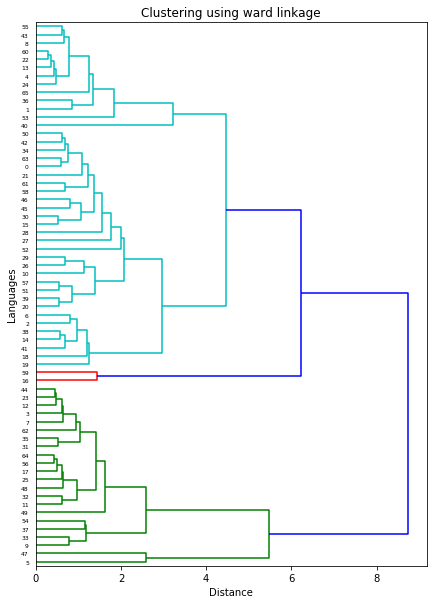

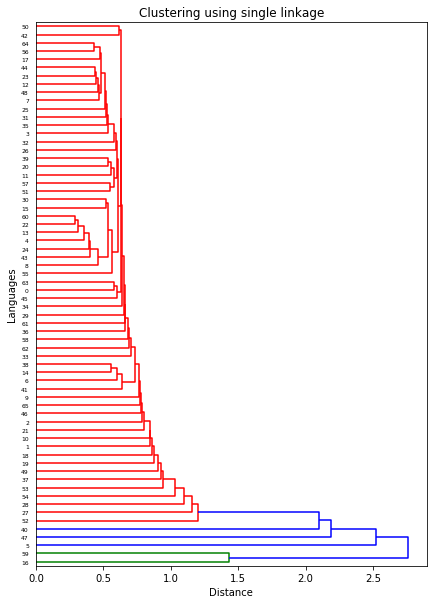

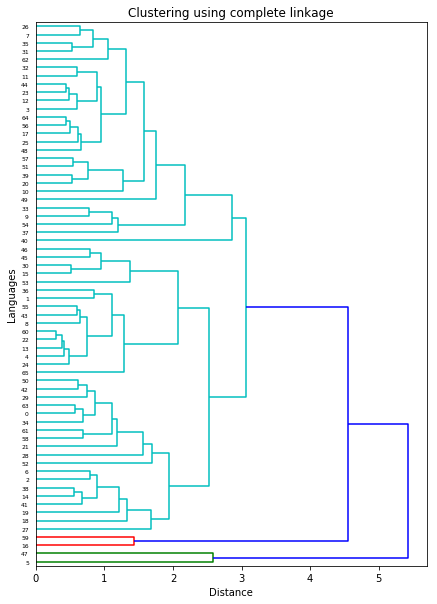

In [205]:
# 3.4
for method in ["ward", "single", "complete"]:
    plt.figure(figsize=(7, 10))
    Z = hierarchy.linkage(vecs, method=method)
    labels = str(range(22))
    hierarchy.dendrogram(Z, distance_sort="descending", orientation="right", show_leaf_counts=True)
    plt.title(f"Clustering using {method} linkage")
    plt.ylabel("Languages")
    plt.xlabel("Distance")
    plt.savefig(f"results/3_4_{method}.png")
    plt.show()

In [218]:
language_0 = Xtrn[Ytrn == 0]
language_0_test = Xtst[Ytst == 0]

In [211]:
gmm = GMM(n_components=1, covariance_type='diag').fit(language_0)

In [222]:
log_likelihoods_train = {}
log_likelihoods_test = {}
cv_types = ["diag", "full"]
n_components = [1, 3, 5, 10, 15]
for cv_type in cv_types:
    log_likelihoods_train[cv_type] = {}
    log_likelihoods_test[cv_type] = {}
    for n in n_components:
        gmm_n = GMM(n_components=n, covariance_type=cv_type).fit(language_0)
        log_likelihoods_train[cv_type][n] = gmm_n.score(language_0)
        log_likelihoods_test[cv_type][n] = gmm_n.score(language_0_test)

In [224]:
log_likelihoods_train

{'diag': {1: array([ 9.22737124,  4.22881591, 14.00736803, ..., 17.92841116,
         16.54006069, 15.49782824]),
  3: array([ 7.64751843,  2.73499115, 14.56722963, ..., 19.76424997,
         18.04299085, 18.46654575]),
  5: array([ 9.73273089,  2.42393748, 15.59720616, ..., 20.1829469 ,
         18.13310841, 18.83528811]),
  10: array([ 7.56051719,  3.51106362, 18.72738861, ..., 20.10753465,
         17.56608507, 19.12743677]),
  15: array([10.84256778,  3.61042729, 18.22757531, ..., 20.82139715,
         18.47034948, 20.3908496 ])},
 'full': {1: array([10.79583293,  7.88679412, 16.32888918, ..., 19.26619736,
         17.74751257, 19.25016275]),
  3: array([13.12652993,  8.69518631, 18.06874173, ..., 20.95978636,
         19.26995156, 21.07536276]),
  5: array([15.54237226, 13.26864715, 19.58183916, ..., 22.35071091,
         19.93750715, 22.03806897]),
  10: array([15.47260957, 13.72154896, 22.66155432, ..., 23.48119286,
         19.04473714, 22.09543146]),
  15: array([16.32168418, 